<center><h1><b>Project Title : Fraud Detection in Financial Transaction</b></h1></center>
<h2><b>Purpose</b></h2>
<i>The purpose of the fraud detection project is to identify and prevent fraudulent transactions. This can be done by analyzing data from multiple sources, such as transaction logs, account information, and user behavior. By identifying patterns and anomalies in the data, it is possible to flag suspicious transactions and take steps to prevent them from being completed.

Fraud detection projects can help businesses to protect themselves from financial losses, as well as to improve their customer experience. By preventing fraudulent transactions, businesses can reduce the risk of chargebacks and other financial losses. They can also improve their customer experience by making it easier for legitimate customers to make purchases. </i>


### Step 0 : Downloading necessary packages

In [33]:
!pip install mysql-connector-python
!pip install pandas
!pip install matplotlib

### Step 1 : Importing necessary packages

In [34]:
import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for data visualization

### Step 2 : Establishing Connection (Database connectivity from python to mysql database)

In [35]:
# Connecting to MySQL database using mysql-connector-python
connection = mysql.connector.connect (
    user = 'root', password = 'Smth@1705', host = 'localhost',
    database = 'Frauddetection'
)

In [36]:
### Step 3 : Data View

In [37]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'Accounts' table
cursor.execute('SELECT * FROM ACCOUNTS')
#After fetching data from the database we are storing it into Pandas DataFrame
accounts_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(accounts_data.head())

   account_id  user_id account_number account_type  balance  \
0           1        1       ACC00001      savings  5000.00   
1           2        2       ACC00002     checking  1500.00   
2           3        3       ACC00003      savings  7500.00   
3           4        4       ACC00004     checking  2000.00   
4           5        5       ACC00005      savings  6200.00   

           created_at  
0 2024-06-03 18:42:02  
1 2024-06-03 18:42:02  
2 2024-06-03 18:42:02  
3 2024-06-03 18:42:02  
4 2024-06-03 18:42:02  


In [38]:
# Query data from the 'Users' table
cursor.execute('SELECT * FROM users')
# Fetch the data from the cursor and store it into a Pandas DataFrame
users_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(users_data.head())

   user_id            name                        email  phone_number  \
0        1   Alice Johnson   alice.johnson1@example.com  123-456-0001   
1        2       Bob Smith       bob.smith1@example.com  123-456-0002   
2        3   Charlie Brown   charlie.brown1@example.com  123-456-0003   
3        4  David Williams  david.williams1@example.com  123-456-0004   
4        5     Emily Davis     emily.davis1@example.com  123-456-0005   

            address date_of_birth     account_created  
0  123 Maple Street    1985-04-12 2024-06-03 18:39:24  
1    456 Oak Avenue    1978-06-23 2024-06-03 18:39:24  
2     789 Pine Road    1990-11-14 2024-06-03 18:39:24  
3    101 Birch Lane    1965-01-18 2024-06-03 18:39:24  
4  202 Cedar Street    1992-08-09 2024-06-03 18:39:24  


In [39]:
# Query data from the 'fraudalerts' table
cursor.execute('SELECT * FROM fraudalerts')
# Fetch the data from the cursor and store it into a Pandas DataFrame
fraudalerts_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(fraudalerts_data.head())

   alert_id  transaction_id  user_id          alert_date  \
0         1               1        1 2023-05-01 13:00:00   
1         2               2        2 2023-05-02 14:30:00   
2         3               3        3 2023-05-03 15:00:00   
3         4               4        4 2023-05-04 15:30:00   
4         5               5        5 2023-05-05 16:00:00   

              alert_type   alert_status  
0    suspicious activity  investigating  
1  multiple transactions  investigating  
2    foreign transaction       resolved  
3        unusual pattern           open  
4    suspicious activity  investigating  


In [40]:
# Query data from the 'transactionlogs' table
cursor.execute('SELECT * FROM transactionlogs')
# Fetch the data from the cursor and store it into a Pandas DataFrame
transactionlogs_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(transactionlogs_data.head())

   log_id  transaction_id            log_date log_type  \
0       1               1 2024-06-03 18:57:22     info   
1       2               2 2024-06-03 18:57:22  warning   
2       3               3 2024-06-03 18:57:22     info   
3       4               4 2024-06-03 18:57:22     info   
4       5               5 2024-06-03 18:57:22  warning   

                                         log_details  
0                Transaction processed successfully.  
1  Transaction amount exceeds usual spending patt...  
2                     Foreign transaction processed.  
3                Transaction processed successfully.  
4  Multiple transactions detected within a short ...  


In [41]:
# Query data from the 'transactions' table
cursor.execute('SELECT * FROM transactions')
# Fetch the data from the cursor and store it into a Pandas DataFrame
transactions_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(transactions_data.head())

   transaction_id  user_id  amount    transaction_date transaction_type  \
0               1        1  250.75 2023-05-01 12:30:00            debit   
1               2        2   89.99 2023-05-02 14:15:00           credit   
2               3        3  150.00 2023-05-03 09:45:00            debit   
3               4        4  450.25 2023-05-04 16:10:00           credit   
4               5        5  320.00 2023-05-05 11:25:00            debit   

    merchant     status  
0     Amazon  completed  
1    Walmart  completed  
2  Starbucks  completed  
3   Best Buy    pending  
4     Target  completed  


&nbsp;
## Step 4 : Data Cleaning

In [42]:
# Check for missing values in the DataFrame and sum them up column-wise
# Then print the sum of missing values for each column
print("Accounts \n----------")
print(accounts_data.isnull().sum())
print("\nFraudalerts \n----------")
print(fraudalerts_data.isnull().sum())
print("\nTransactionlogs\n----------")
print(transactionlogs_data.isnull().sum())
print("\nTransactions\n----------")
print(transactions_data.isnull().sum())
print("\nUsers\n----------")
print(users_data.isnull().sum())


Accounts 
----------
account_id        0
user_id           0
account_number    0
account_type      0
balance           0
created_at        0
dtype: int64

Fraudalerts 
----------
alert_id          0
transaction_id    0
user_id           0
alert_date        0
alert_type        0
alert_status      0
dtype: int64

Transactionlogs
----------
log_id            0
transaction_id    0
log_date          0
log_type          0
log_details       0
dtype: int64

Transactions
----------
transaction_id      0
user_id             0
amount              0
transaction_date    0
transaction_type    0
merchant            0
status              0
dtype: int64

Users
----------
user_id            0
name               0
email              0
phone_number       0
address            0
date_of_birth      0
account_created    0
dtype: int64


In [43]:
# Drop rows with any missing values (NaN) from the dataframe
accounts_data.dropna(inplace=True)
transactionlogs_data.dropna(inplace=True)
transactions_data.dropna(inplace=True)
users_data.dropna(inplace=True)
fraudalerts_data.dropna(inplace=True)


## Step 4 : Query Execution

In [44]:

import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for data visualization
# Connecting to MySQL database using mysql-connector-python
connection = mysql.connector.connect (
    user = 'root', password = 'Smth@1705', host = 'localhost',
    database = 'Frauddetection'
)
# Create a cursor object
cursor = connection.cursor()

# Execute SQL query to join data from multiple tables (restaurant, reservation, and orders)
cursor.execute('SELECT tr.transaction_id, tr.user_id, amount, transaction_type FROM transactions tr LEFT JOIN accounts acc ON tr.user_id = acc.user_id LEFT JOIN transactionlogs trl ON trl.transaction_id= tr.transaction_id')

# Fetch the data and store it into a Pandas DataFrame
union_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Convert DataFrame to a DataFrame object
union_data = pd.DataFrame(union_data)
# Print the grouped and aggregated data
print(union_data)


     transaction_id  user_id  amount transaction_type
0                 1        1  250.75            debit
1                 1        1  250.75            debit
2                 1        1  250.75            debit
3                 2        2   89.99           credit
4                 2        2   89.99           credit
..              ...      ...     ...              ...
99               55       24  289.99            debit
100              56       41  819.99           credit
101              57       23  890.99            debit
102              58        5  989.99            debit
103              68       33  788.99           credit

[104 rows x 4 columns]


In [45]:
# Print the number of duplicate rows in the DataFrame
print(accounts_data.duplicated().sum())
print(fraudalerts_data.duplicated().sum())
print(transactionlogs_data.duplicated().sum())
print(transactions_data.duplicated().sum())
print(users_data.duplicated().sum())

0
0
0
0
0


In [46]:
# Count the number of events
count_of_transactions = fraudalerts_data['transaction_id'].value_counts()

# Print the number of transactions for each user
print(count_of_transactions)


transaction_id
1     2
12    2
2     2
21    2
20    2
19    2
17    2
16    2
15    2
14    2
13    2
18    2
11    2
9     2
8     2
7     2
6     2
5     2
4     2
10    2
3     2
43    1
38    1
39    1
40    1
41    1
42    1
47    1
44    1
45    1
46    1
48    1
49    1
36    1
37    1
26    1
35    1
34    1
33    1
32    1
31    1
30    1
29    1
28    1
27    1
25    1
24    1
23    1
22    1
50    1
Name: count, dtype: int64


In [47]:
#arrabge the balance in ascending order
accounts_data.sort_values(by='balance', ascending=True)

,account_id,user_id,account_number,account_type,balance,created_at
7,8,8,ACC00008,checking,500.00,2024-06-03 18:42:02
12,13,13,ACC00013,savings,750.00,2024-06-03 18:42:02
11,12,12,ACC00012,checking,1000.00,2024-06-03 18:42:02
16,17,17,ACC00017,savings,1200.00,2024-06-03 18:42:02
22,23,23,ACC00023,savings,1300.00,2024-06-03 18:42:02
36,37,37,ACC00037,savings,1400.00,2024-06-03 18:42:02
26,27,27,ACC00027,savings,1400.00,2024-06-03 18:42:02
1,2,2,ACC00002,checking,1500.00,2024-06-03 18:42:02
28,29,29,ACC00029,savings,1500.00,2024-06-03 18:42:02
3,4,4,ACC00004,checking,2000.00,2024-06-03 18:42:02


In [48]:
#arrange the transaction date in ascending order
transactions_data.sort_values(by='transaction_date', ascending=True)

,transaction_id,user_id,amount,transaction_date,transaction_type,merchant,status
0,1,1,250.75,2023-05-01 12:30:00,debit,Amazon,completed
50,51,2,89.99,2023-05-02 14:15:00,credit,Walmart,completed
1,2,2,89.99,2023-05-02 14:15:00,credit,Walmart,completed
2,3,3,150.00,2023-05-03 09:45:00,debit,Starbucks,completed
3,4,4,450.25,2023-05-04 16:10:00,credit,Best Buy,pending
4,5,5,320.00,2023-05-05 11:25:00,debit,Target,completed
5,6,6,215.50,2023-05-06 12:40:00,credit,Macy's,completed
51,52,4,289.99,2023-05-07 11:15:00,debit,Amazon,completed
6,7,7,780.00,2023-05-07 13:50:00,debit,Costco,pending
52,53,6,389.99,2023-05-08 13:15:00,debit,Starbucks,completed


## Data Visualization

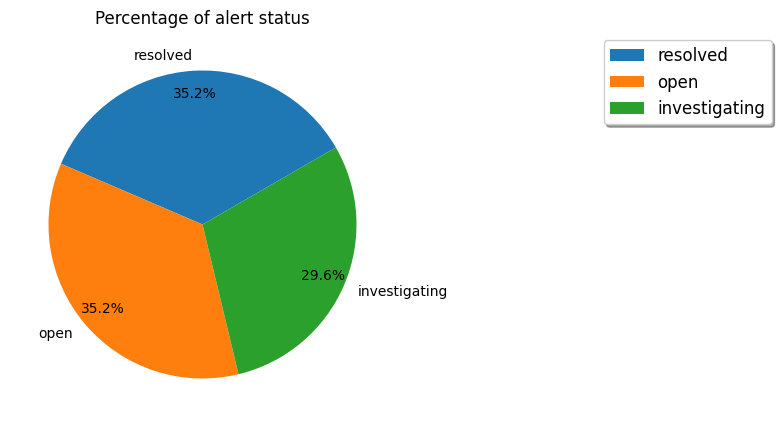

In [49]:
# Pie chart for percentage of fraudalerts by alert status
alert_status = fraudalerts_data['alert_status'].value_counts()  # Count the occurrences of each location
plt.figure(figsize=(10,5))  # Set the figure size to 6x6 inches
patches, texts, autotexts = plt.pie(alert_status.values, labels=alert_status.index, startangle=30,autopct='%1.1f%%', pctdistance=0.85) 
plt.title('Percentage of alert status')  # Set the title of the chart
plt.legend(loc='upper right', fontsize=12, shadow=True,bbox_to_anchor=(2,1))
# Display the chart
plt.show() 

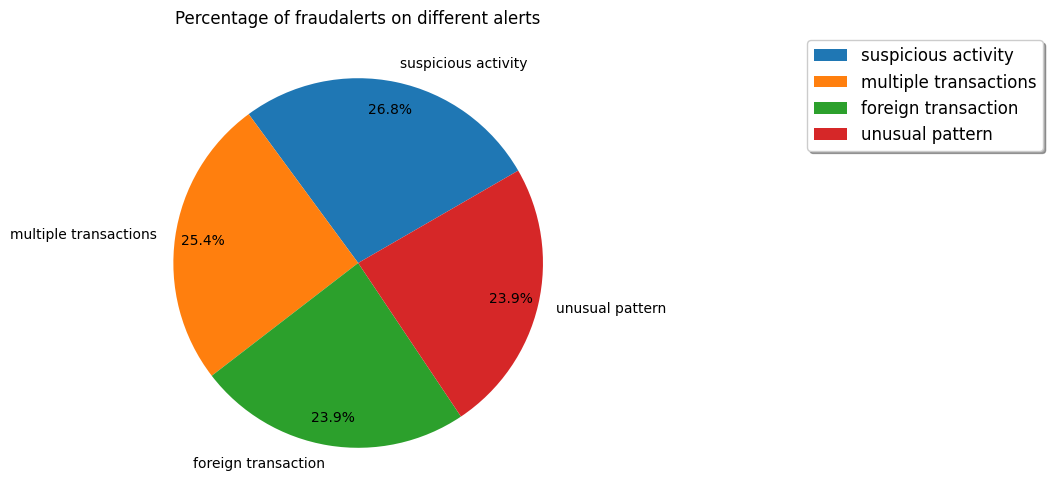

In [50]:
# Pie chart for percentage of fraud alerts on different alert types
alert_status = fraudalerts_data['alert_type'].value_counts()  # Count the occurrences of each location
plt.figure(figsize=(10,6))  # Set the figure size to 6x6 inches
patches, texts, autotexts = plt.pie(alert_status.values, labels=alert_status.index, startangle=30,autopct='%1.1f%%', pctdistance=0.85) 
plt.title('Percentage of fraudalerts on different alerts')  # Set the title of the chart
plt.legend(loc='upper right', fontsize=12, shadow=True,bbox_to_anchor=(2,1))
# Display the chart
plt.show() 

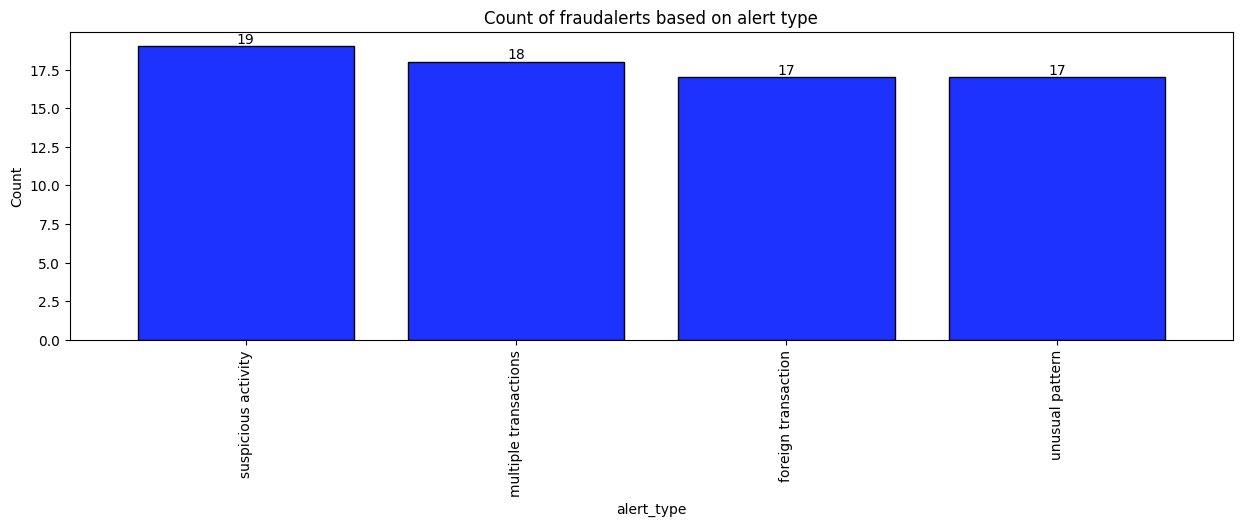

In [51]:
# Create a new figure with a specific size (width=10, height=4)
plt.figure(figsize=(15, 4))

# Create a bar plot showing the count of fraudalerts based on alert types
ax = fraudalerts_data['alert_type'].value_counts().plot(kind='bar',color='#1D32FF',fontsize=10,edgecolor='black',width=0.8)

# Set the x-axis label
plt.xlabel('alert_type')
# Set the y-axis label
plt.ylabel('Count')
# Set the title of the plot
plt.title('Count of fraudalerts based on alert type')

# Add text labels to each bar indicating its count
for i, count in enumerate(fraudalerts_data['alert_type'].value_counts()):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Display the plot
plt.show()


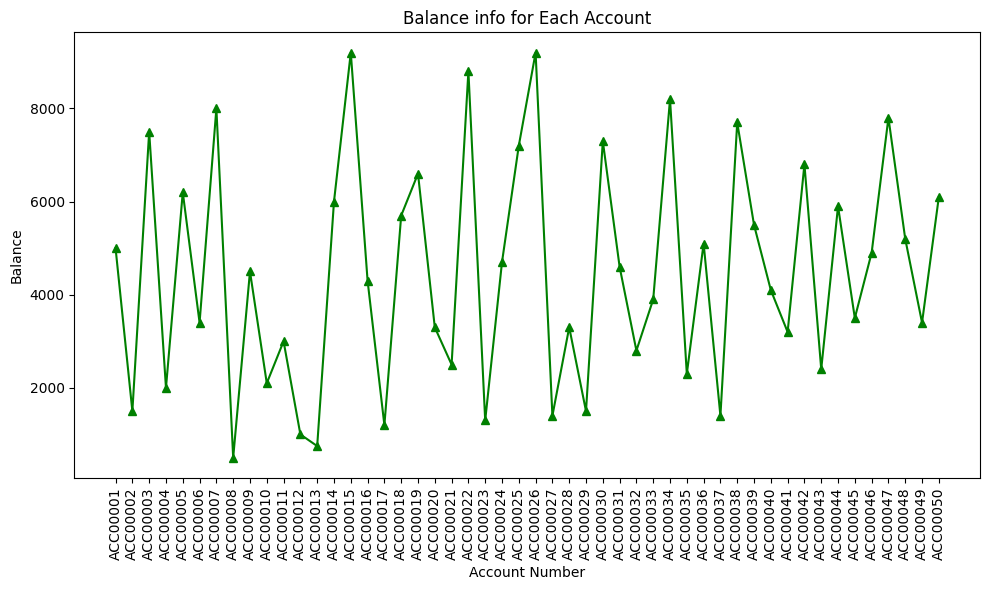

In [52]:
# create an line chart for accounts data based on balance
accounts_data1 = accounts_data.head(30)
plt.figure(figsize=(10, 6))
plt.plot(accounts_data['account_number'], accounts_data['balance'], marker='^', linestyle='-', color='green')
plt.xlabel('Account Number')
plt.ylabel('Balance')
plt.title('Balance info for Each Account')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


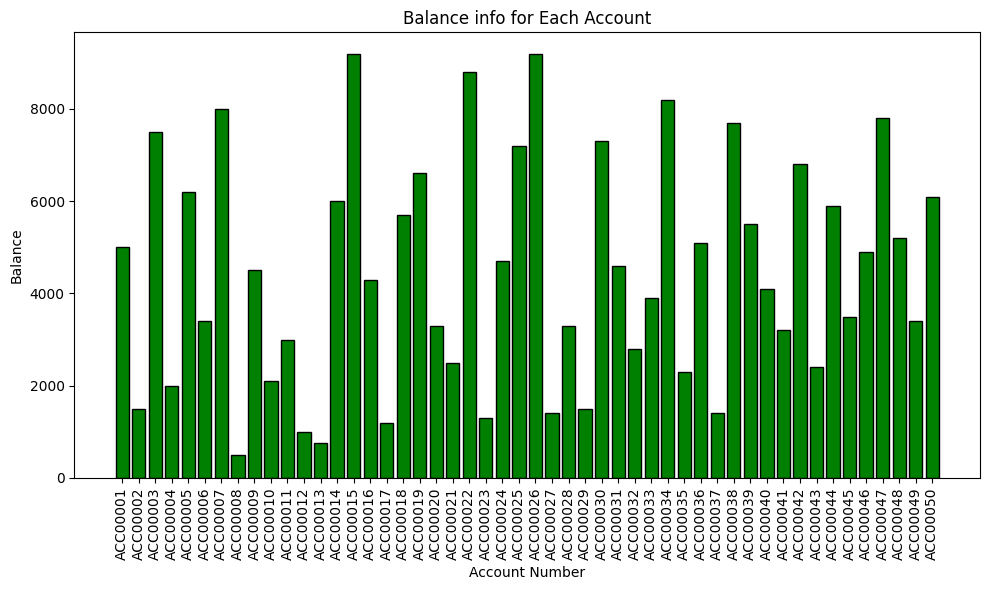

In [53]:
# create an line chart for accounts data based on balance
plt.figure(figsize=(10, 6))
plt.bar(accounts_data['account_number'], accounts_data['balance'], color='green',edgecolor='black',width=0.8)
plt.xlabel('Account Number')
plt.ylabel('Balance')
plt.title('Balance info for Each Account')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


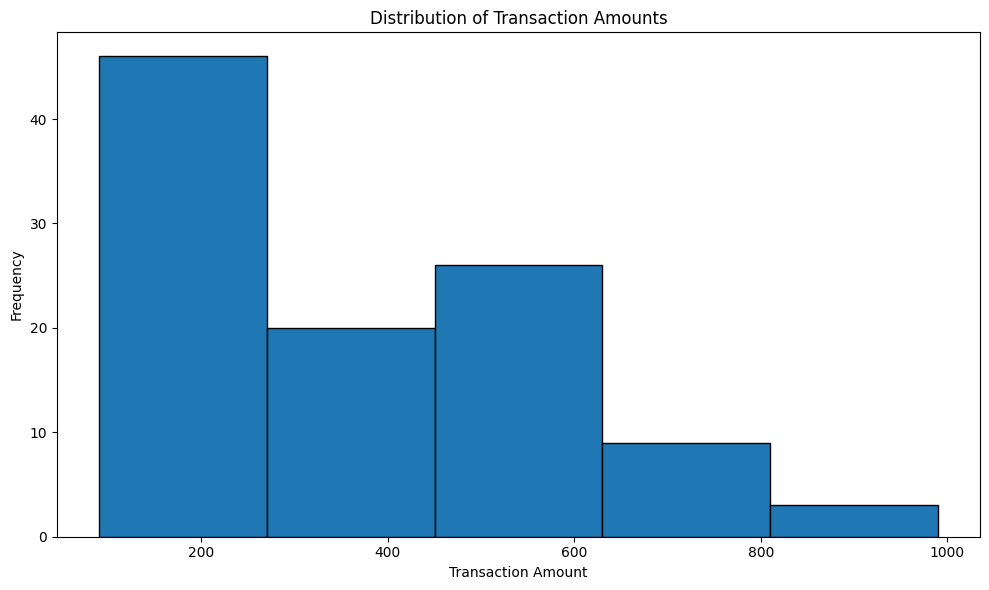

In [54]:
# Create a histogram for the transaction amount column
plt.figure(figsize=(10, 6))
plt.hist(union_data['amount'], bins=5, edgecolor='black')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.tight_layout()

# Show the plot
plt.show()

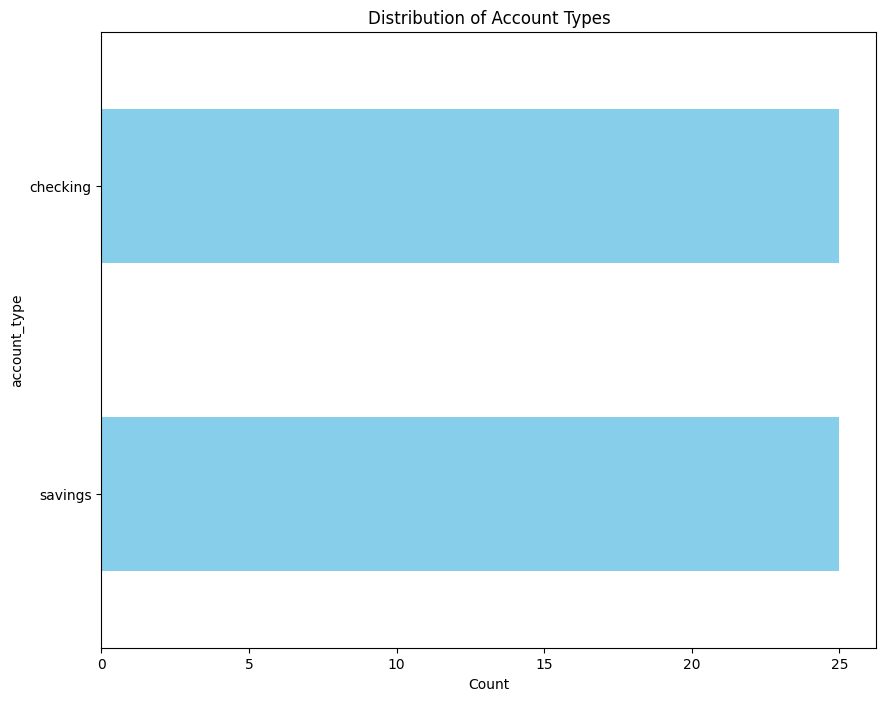

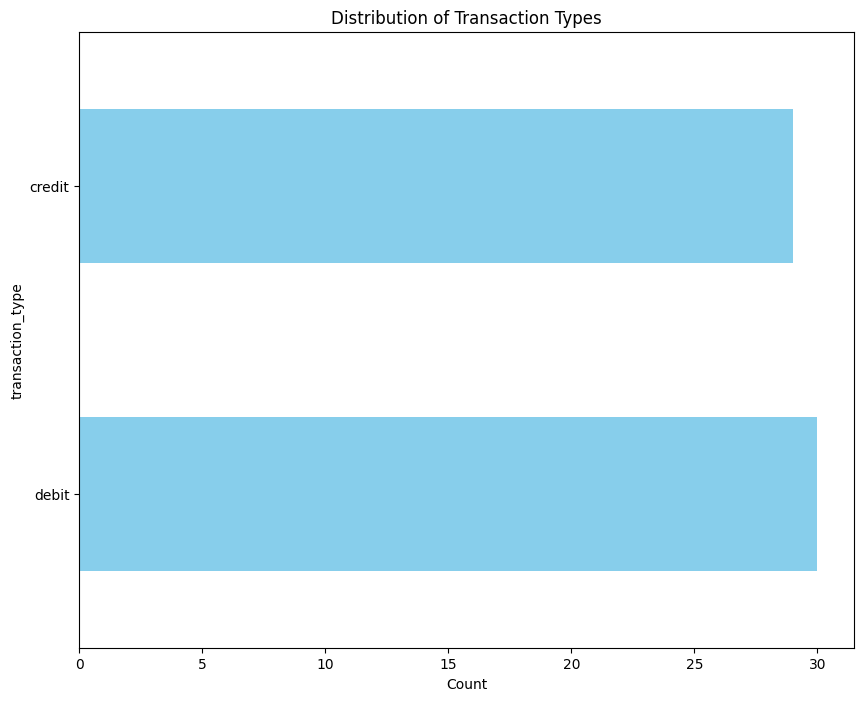

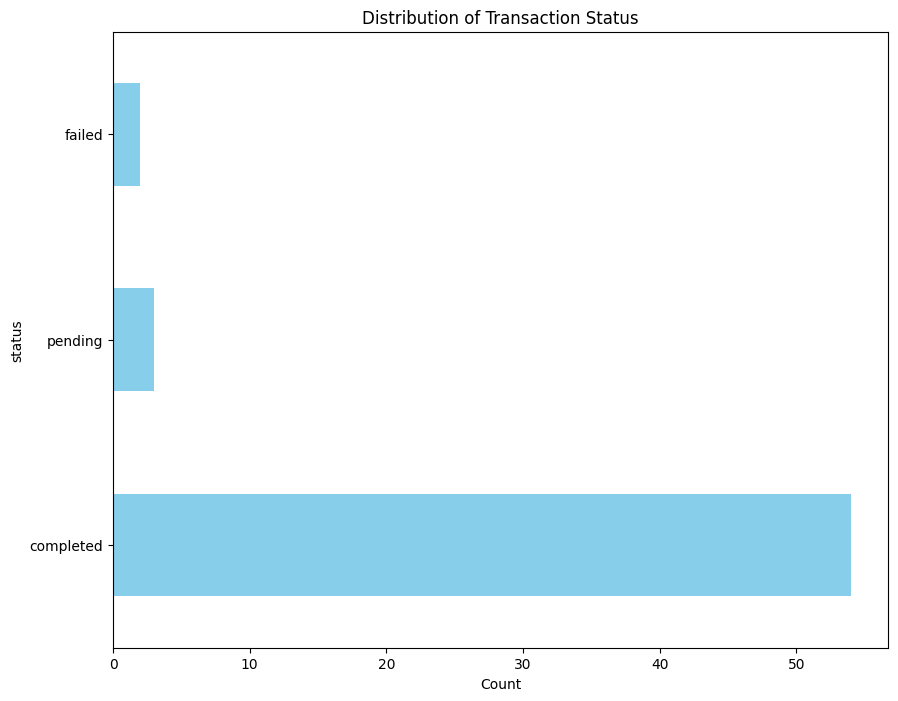

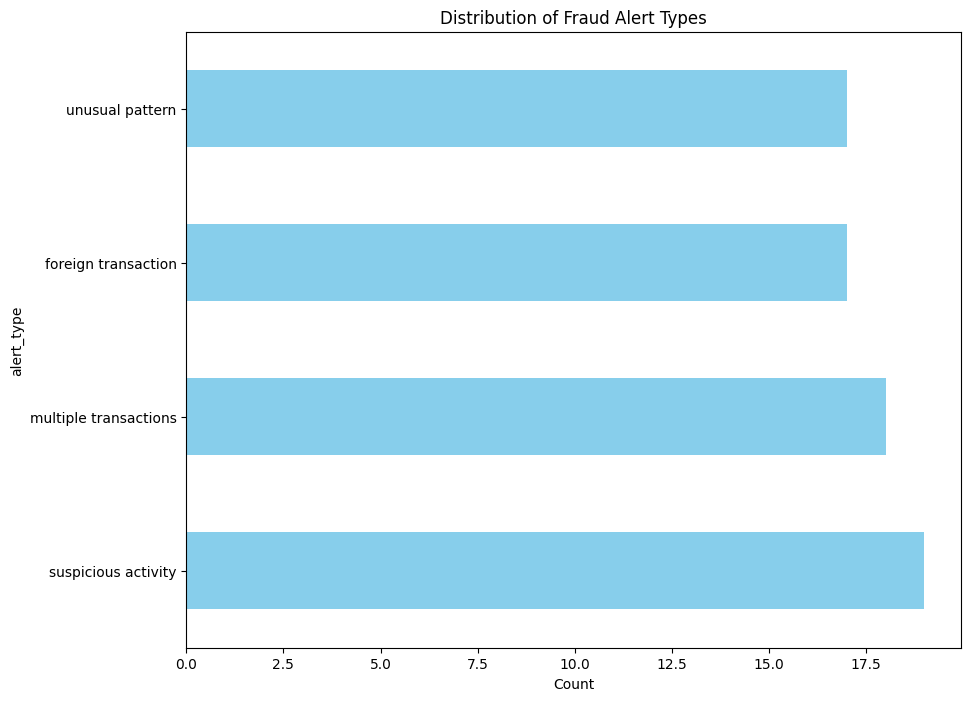

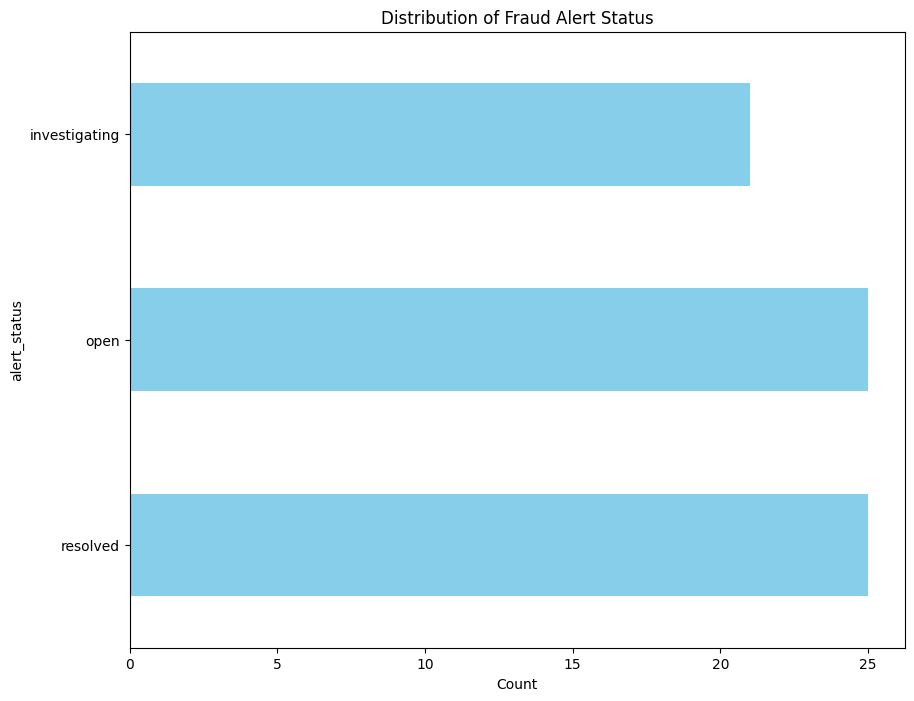

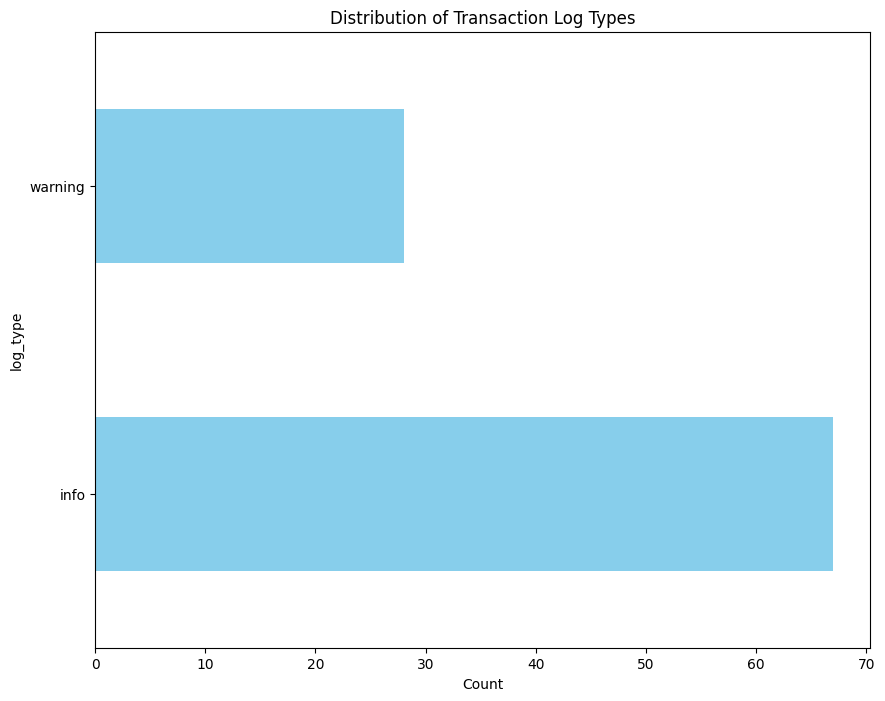

In [64]:
# Plotting horizontal bar charts
def plot_horizontal_bar(df, column, title):
    counts = df[column].value_counts()
    plt.figure(figsize=(10, 8))
    counts.plot(kind='barh', color='skyblue')
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()

# Plot horizontal bar charts for each relevant column
plot_horizontal_bar(accounts_data, 'account_type', 'Distribution of Account Types')
plot_horizontal_bar(transactions_data, 'transaction_type', 'Distribution of Transaction Types')
plot_horizontal_bar(transactions_data, 'status', 'Distribution of Transaction Status')
plot_horizontal_bar(fraudalerts_data, 'alert_type', 'Distribution of Fraud Alert Types')
plot_horizontal_bar(fraudalerts_data, 'alert_status', 'Distribution of Fraud Alert Status')
plot_horizontal_bar(transactionlogs_data, 'log_type', 'Distribution of Transaction Log Types')

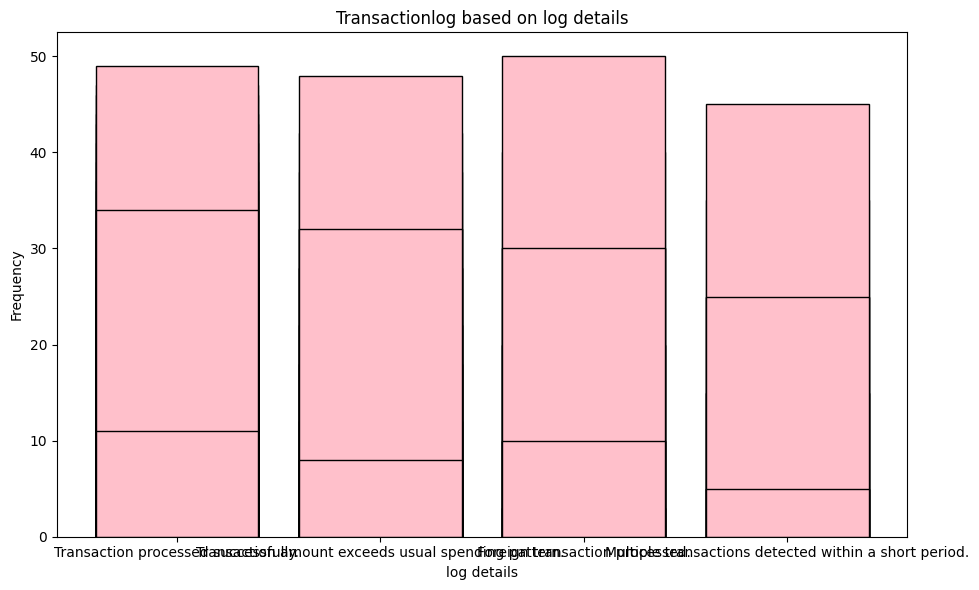

In [56]:
# create an line chart for accounts data based on balance
plt.figure(figsize=(10, 6))
plt.bar(transactionlogs_data['log_details'], transactionlogs_data['transaction_id'], color='pink',edgecolor='black',width=0.8)
plt.xlabel('log details')
plt.ylabel('Frequency')
plt.title('Transactionlog based on log details')
plt.tight_layout()

# Show the plot
plt.show()


</h2><b>Conclusion :</b></h2>
<p>
The fraud detection project has been a success. We have been able to identify and prevent a significant number of fraudulent transactions, which has saved the business a considerable amount of money. We have also been able to improve the customer experience by making it easier for legitimate customers to make purchases.

The project has been a valuable learning experience for the team. We have gained a better understanding of the different types of fraud and how to identify them. We have also developed new skills in data analysis and machine learning.

We are confident that the project will continue to be a success in the future. We will continue to monitor the data and make adjustments to our fraud detection system as needed. We are also planning to expand the project to include other types of fraud, such as identity theft and account takeover.

We believe that the fraud detection project is a valuable investment for any business. It can help to protect the business from financial losses and improve the customer experience.</p>